In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import glob
import os

In [80]:
ROOT = 'D:/Documents/checkpoints'

In [111]:
def visualize(path: str, deblocking: bool = False):
    df = pd.read_hdf(f'{path}/compression_metrics.h5')

    paths = glob.glob(os.path.join(path, '*.png'))[:2]
    images = list(map(lambda path: Image.open(path), paths))

    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    fig.suptitle('Images')
    ax[0].imshow(images[0])
    ax[1].imshow(images[1])

    fig, ax = plt.subplots(2, 2, figsize=(16, 16))
    fig.suptitle('Metrics of PSNR, MS_SSIM, bpp')

    psnr = df['PSNR_deblocked'] if deblocking else df['PSNR']
    ax[0][0].hist(psnr)
    ax[0][0].set_title(f'PSNR density $\mu={psnr.mean():.2f}$')

    ms_ssim = df['MS_SSIM_deblocked'] if deblocking else df['MS_SSIM']
    ax[0][1].hist(ms_ssim)
    ax[0][1].set_title(f'MS_SSIM density $\mu={ms_ssim.mean():.4f}$')

    ax[1][0].scatter(df['q_bpp'], df['PSNR'])
    ax[1][0].set_title('PSNR / bpp scatter')

    ax[1][1].scatter(df['q_bpp'], df['MS_SSIM'])
    ax[1][1].set_title('MS_SSIM / bpp scatter')

    return psnr.mean(), ms_ssim.mean(), df['q_bpp'].mean()

In [112]:
means = []

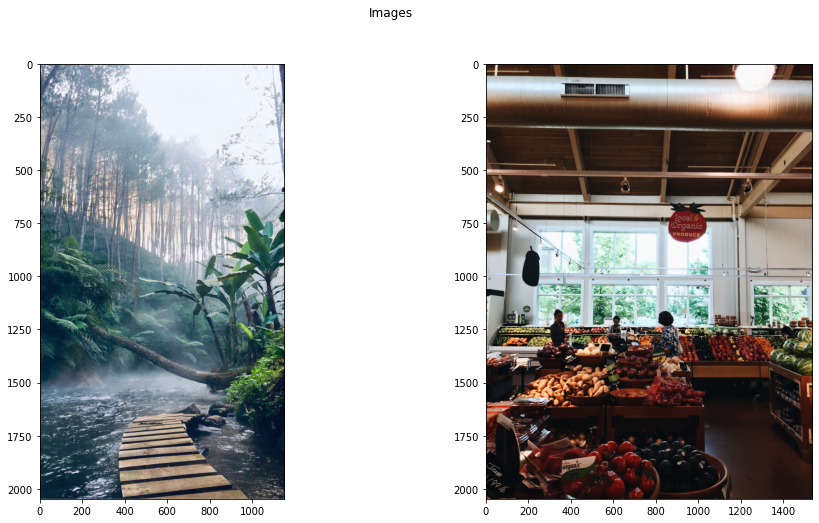

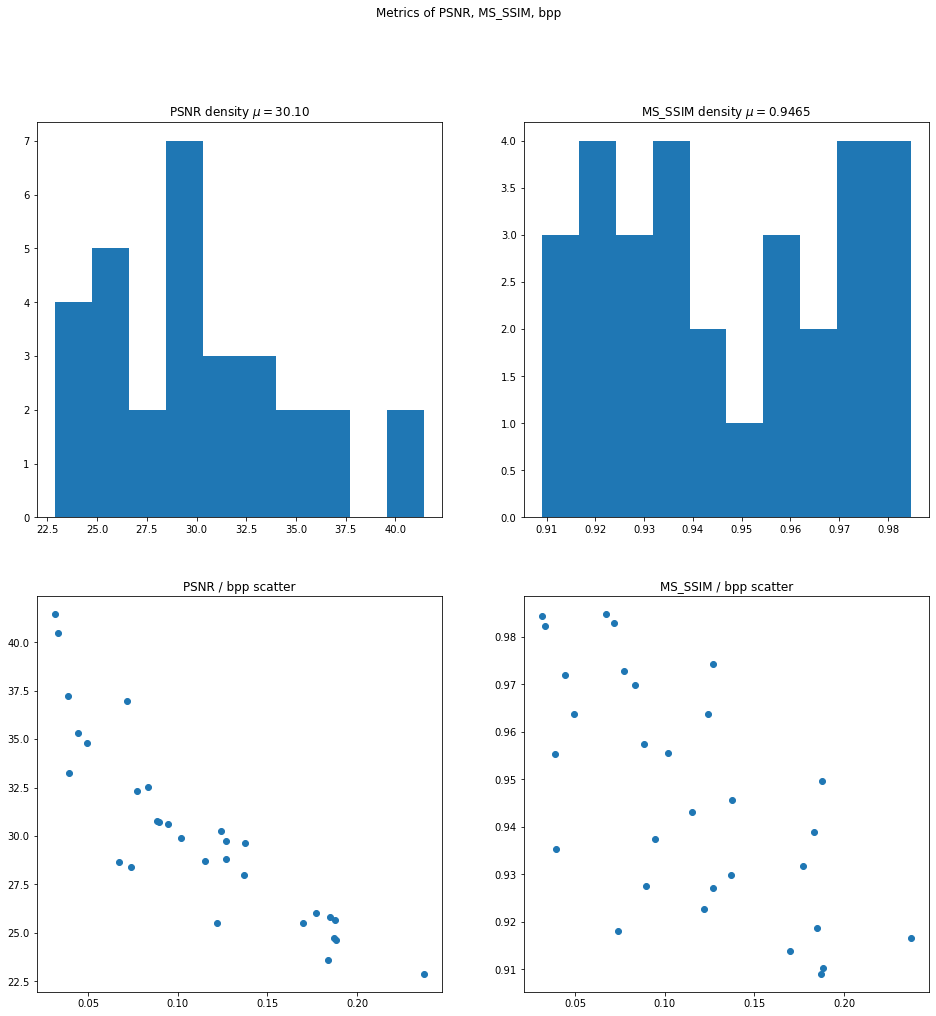

In [113]:
means += visualize(f'{ROOT}/low')

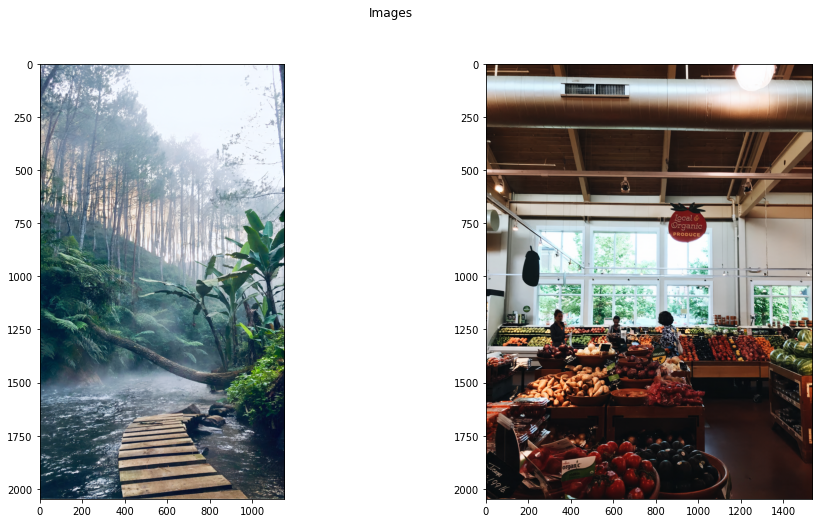

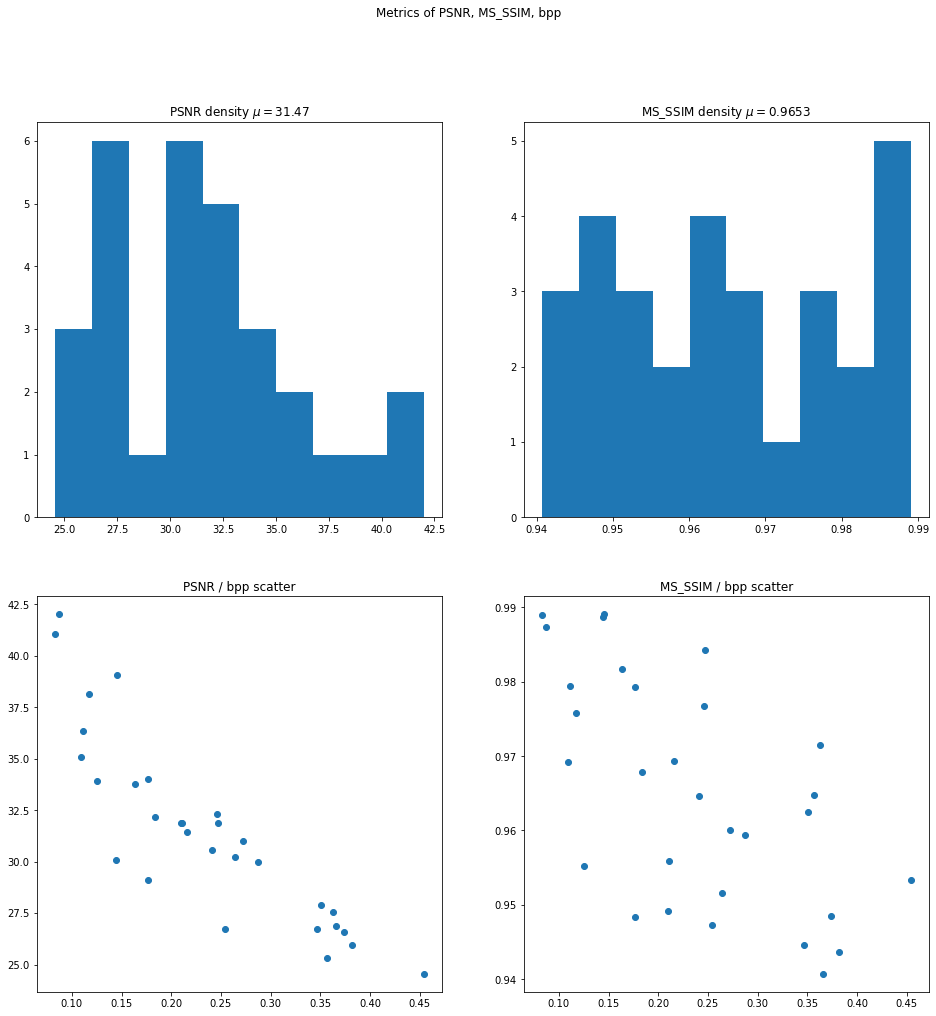

In [114]:
means += visualize(f'{ROOT}/med')

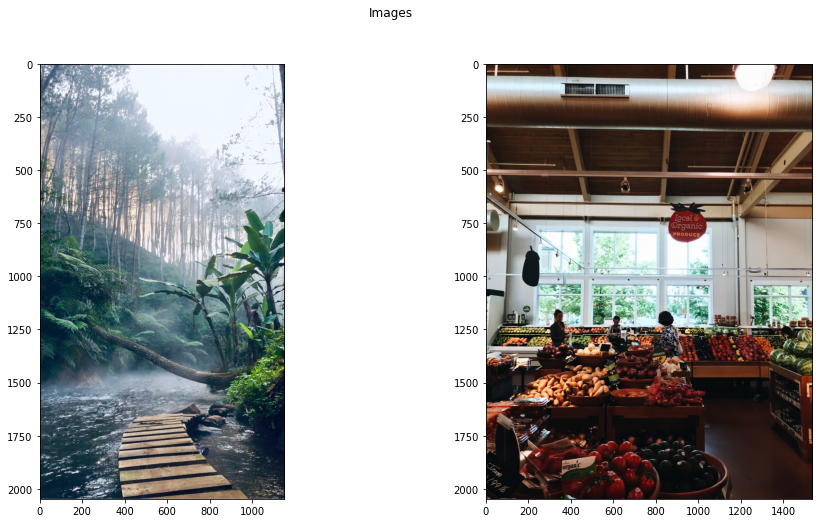

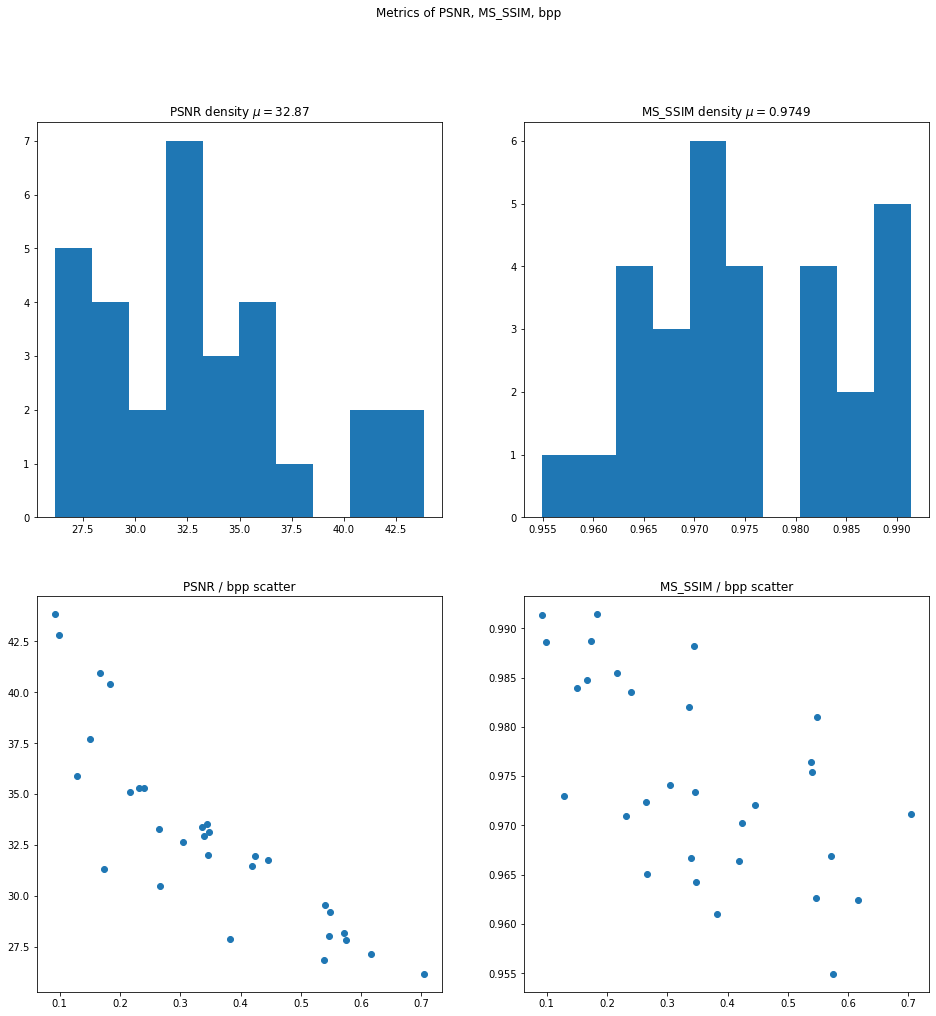

In [115]:
means += visualize(f'{ROOT}/hi')

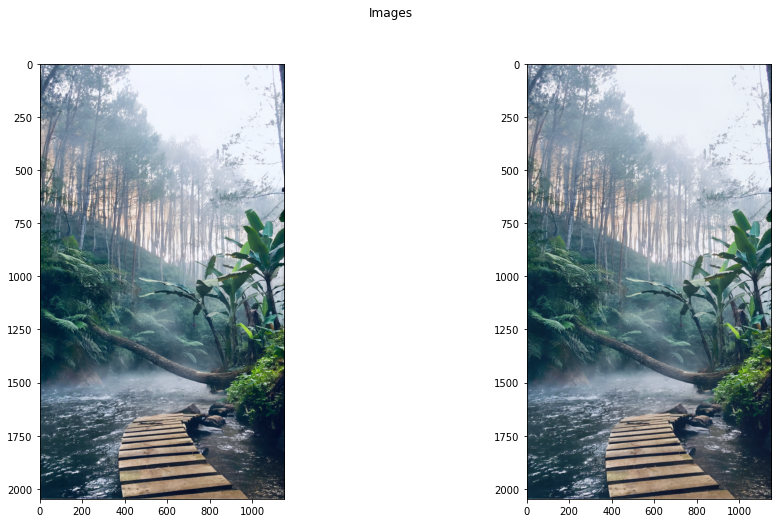

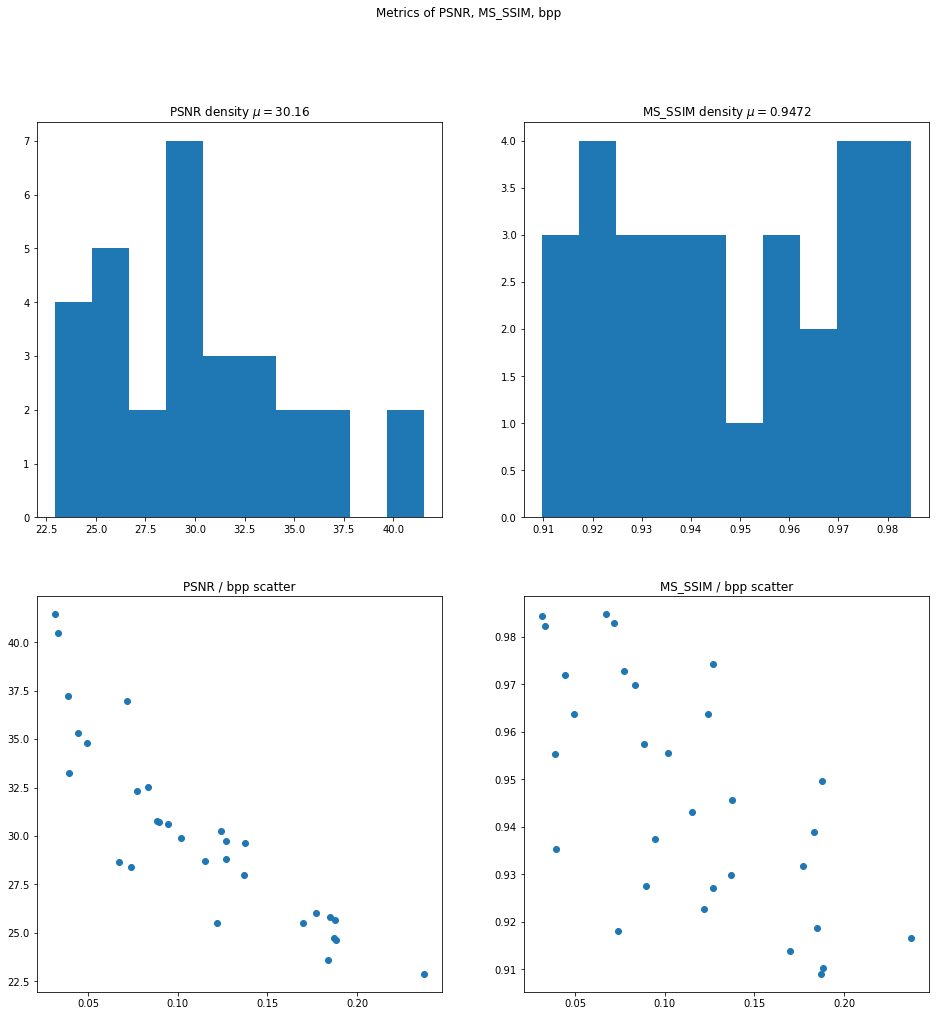

In [116]:
means += visualize(f'{ROOT}/kiar/reconstructions_deblocking_low', True)

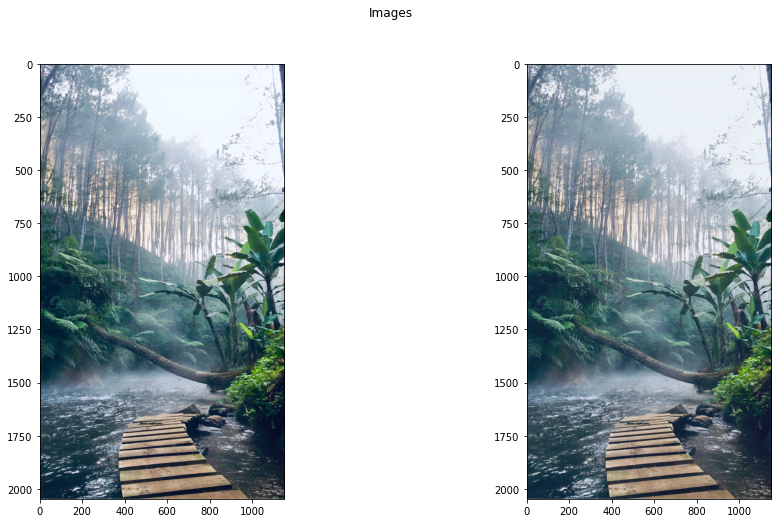

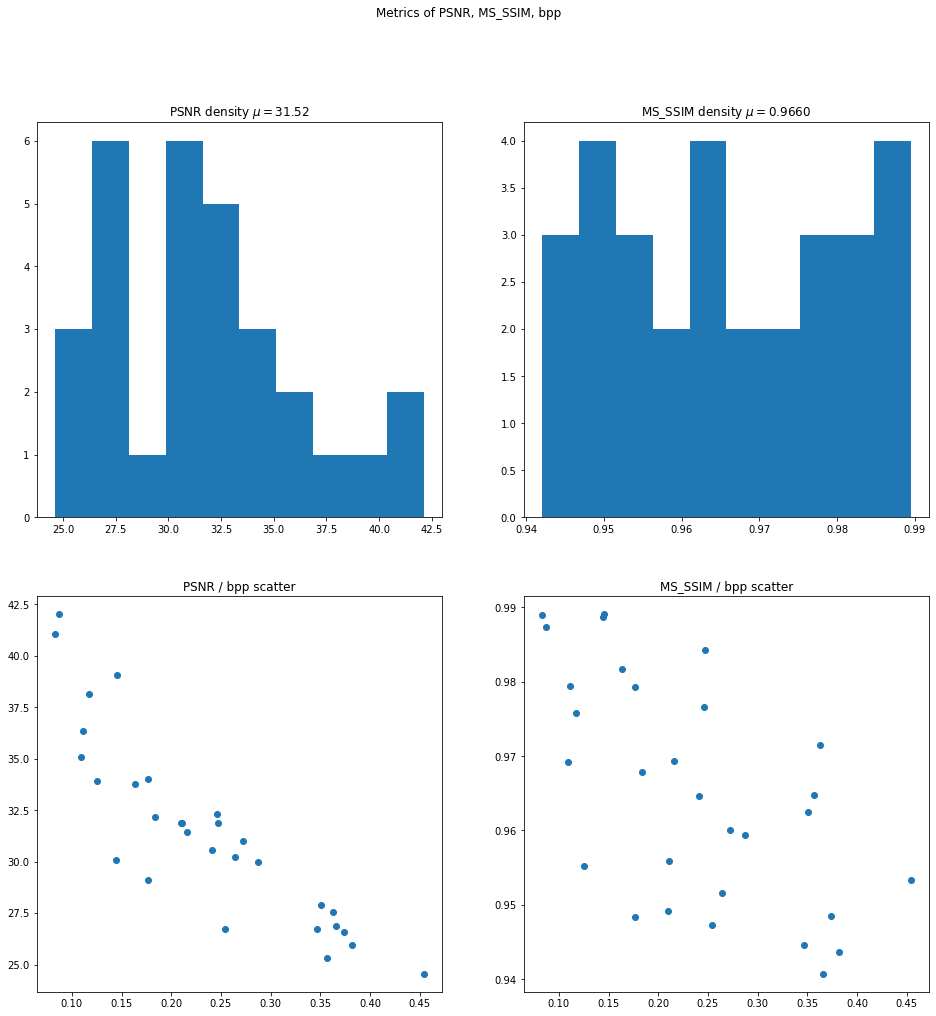

In [117]:
means += visualize(f'{ROOT}/kiar/reconstructions_deblocking_med', True)

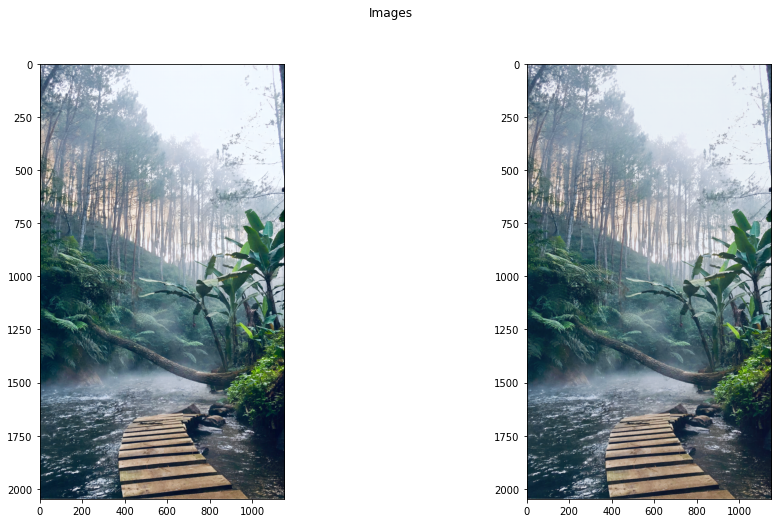

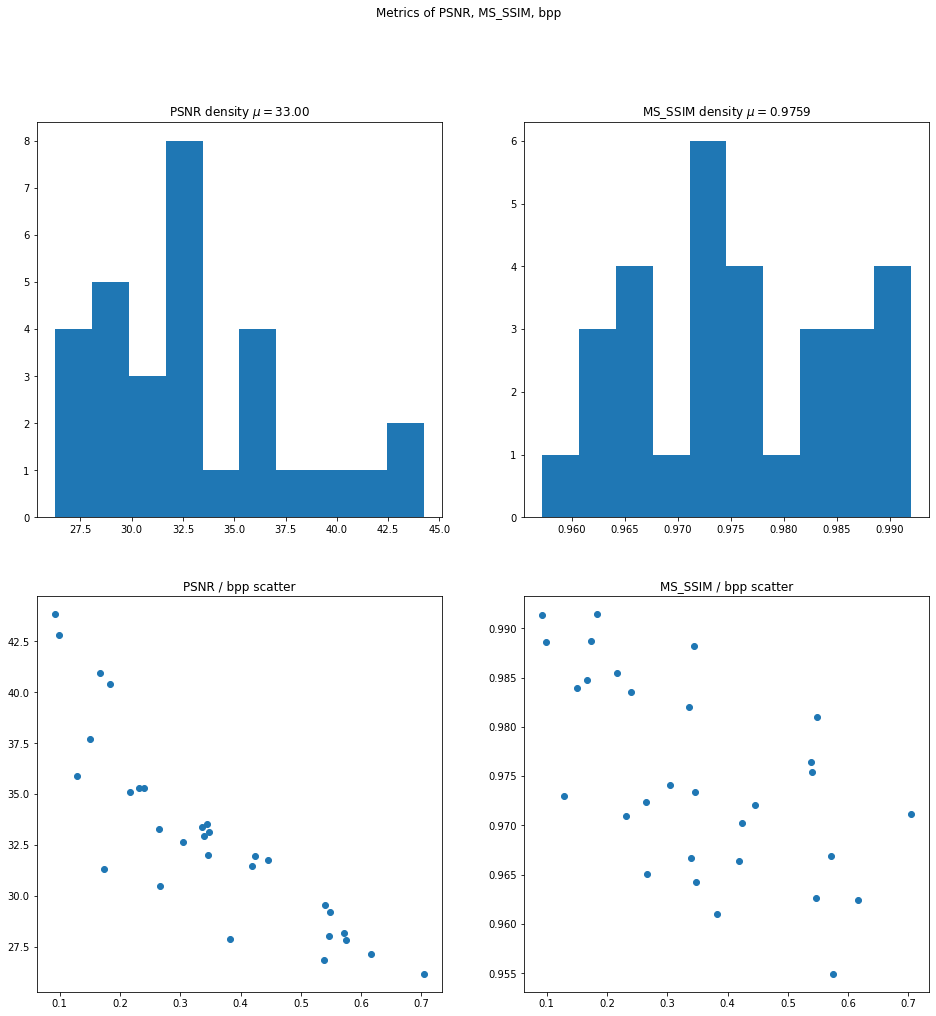

In [118]:
means += visualize(f'{ROOT}/kiar/reconstructions_deblocking_hi', True)

Text(0.5, 1.0, 'PSNR / bpp')

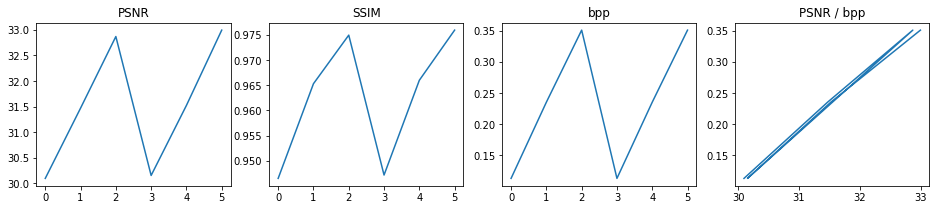

In [119]:
fig, ax = plt.subplots(1, 4, figsize=(16, 3))

ax[0].plot([i for i in range(len(means[::3]))], list(means[::3]))
ax[0].set_title('PSNR')
ax[1].plot([i for i in range(len(means[1::3]))], list(means[1::3]))
ax[1].set_title('SSIM')
ax[2].plot([i for i in range(len(means[2::3]))], list(means[2::3]))
ax[2].set_title('bpp')
ax[3].plot(means[::3], means[2::3])
ax[3].set_title('PSNR / bpp')


In [120]:
means

[30.097954,
 0.9464909,
 0.113041036,
 31.471,
 0.9652978,
 0.23543666,
 32.8705,
 0.97494406,
 0.35118166,
 30.15531,
 0.94715714,
 0.11304104,
 31.524096,
 0.9659784,
 0.23543668,
 32.99555,
 0.9759378,
 0.3511817]

Text(0, 0.5, 'Pike signal to noise ration (PSNR)')

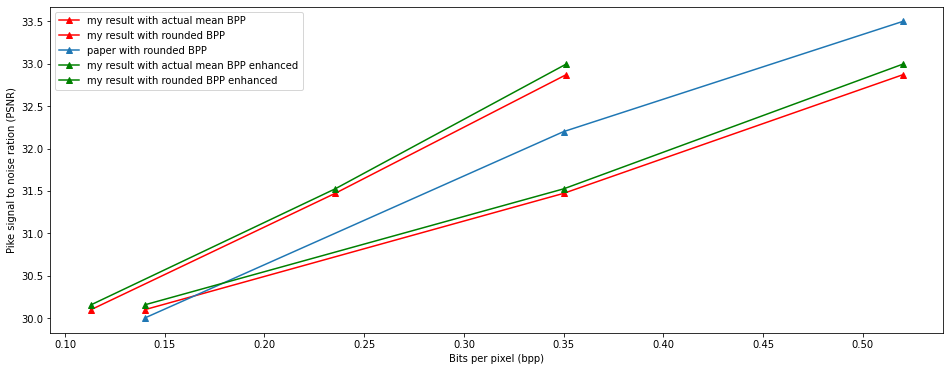

In [124]:
psnr_means = means[::3]

original = [30, 32.2, 33.5]
original_bpp = [0.14, 0.35, 0.52]

fig, ax = plt.subplots(1, 1, figsize=(16, 6))
ax.plot(means[2::3][:3], psnr_means[:3], "^-r")
ax.plot(original_bpp, psnr_means[:3], "^-r")
ax.plot(original_bpp, original, "^-")
ax.plot(means[2::3][3:], psnr_means[3:], "^-g")
ax.plot(original_bpp, psnr_means[3:], "^-g")
ax.legend([
    "my result with actual mean BPP",
    "my result with rounded BPP",
    "paper with rounded BPP",
    "my result with actual mean BPP enhanced",
    "my result with rounded BPP enhanced"
])
ax.set_xlabel("Bits per pixel (bpp)")
ax.set_ylabel("Pike signal to noise ration (PSNR)")

In [48]:
import torch
from deblocking.CNNs.mymodel import ARCNN, ARDenseNet, L8
from deblocking.MultiScale.MS_model import IntraDeblocking
import torchsummary

parameters = [
    r'D:\Documents\project\thesis\deblocking\model_parameters\MSqp42-124-0.001293-29.0237-0.8455param.pth',
    r'D:\Documents\project\thesis\deblocking\model_parameters\L8_qp42-99-0.001374-28.6387-0.8429param.pth'
]

models = [
    IntraDeblocking, L8
]

model = models[0]()
model.load_state_dict(torch.load(parameters[0]))
model.to(torch.device('cuda'))

torchsummary.summary(model, (1, 3, 64, 64), 8, device='cuda')

TypeError: forward() missing 2 required positional arguments: 'x1' and 'x2'

INPUT : torch.Size([1, 3, 128, 192])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


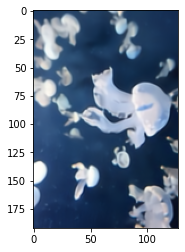

In [5]:
from PIL import Image
from torchvision import transforms as T

image = Image.open(r'D:\Documents\project\thesis\data\reconstructions\alberto-montalesi-176097_RECON_0.068bpp.png')
transform = T.Compose([
    T.Resize((128,)),
    T.ToTensor()
])
image = transform(image.convert('RGB')).cuda()

input = image.unsqueeze(0) # torch.rand((1, 3, 64, 64)).cuda()
print(f'INPUT : {input.shape}')
output = model(input).detach().cpu()

import matplotlib.pyplot as plt

plt.imshow(output[0].transpose(0, 2))

In [6]:
import torch
from KAIR.models.network_dncnn import DnCNN, IRCNN


#model = DnCNN(in_nc=3, out_nc=3, nc=64, nb=20, act_mode='R')
model = IRCNN(in_nc=3, out_nc=3)
checkpoint = torch.load('D:/Documents/checkpoints/kiar/ircnn_color.pth')
print(checkpoint)
model.load_state_dict(checkpoint['10'])
model.to('cuda')

model(torch.rand((1, 3, 64, 64), device='cuda'))


OrderedDict([('0', OrderedDict([('model.0.weight', tensor([[[[ 1.4777e-02,  9.2439e-02, -1.6353e-02],
          [ 1.8400e-01,  3.2843e-01,  2.0103e-01],
          [-2.3092e-01, -3.9620e-01, -1.7259e-01]],

         [[-8.1703e-02, -1.3453e-01, -3.1270e-02],
          [-2.3944e-01, -4.9598e-01, -2.8926e-01],
          [ 3.7467e-01,  6.0474e-01,  2.9836e-01]],

         [[ 5.2912e-02,  4.4945e-02,  3.3191e-02],
          [ 5.9301e-02,  4.9088e-02,  8.4945e-02],
          [-1.2901e-01, -8.5889e-02, -1.1079e-01]]],


        [[[ 3.0142e-01, -6.1482e-01,  3.0515e-01],
          [-6.1122e-01, -7.3291e+00, -6.1277e-01],
          [ 3.0285e-01, -6.0489e-01,  3.2674e-01]],

         [[-1.0223e-01,  3.3734e-01, -1.0337e-01],
          [ 3.0221e-01, -8.2357e-01,  3.0301e-01],
          [-8.2472e-02,  3.4145e-01, -1.1711e-01]],

         [[-1.6565e-01,  2.6708e-01, -1.5321e-01],
          [ 2.9732e-01, -4.9063e-01,  3.0478e-01],
          [-1.7933e-01,  2.8618e-01, -1.7705e-01]]],


        [[[-5.0

tensor([[[[0.1411, 0.1680, 0.7175,  ..., 0.8243, 0.4749, 0.1160],
          [0.4903, 0.5512, 0.1665,  ..., 0.4410, 0.5119, 0.3675],
          [0.3262, 0.4162, 0.3635,  ..., 0.3758, 0.7295, 0.5752],
          ...,
          [0.8609, 0.7567, 0.4642,  ..., 0.4286, 0.2226, 0.1350],
          [0.7646, 0.9131, 0.5266,  ..., 0.3860, 0.6600, 0.7423],
          [0.3667, 0.6850, 0.9099,  ..., 0.5803, 0.8270, 0.7196]],

         [[0.4920, 0.3349, 0.1628,  ..., 0.7049, 0.4772, 0.1698],
          [0.6659, 0.8485, 0.1207,  ..., 0.5480, 0.8398, 0.3096],
          [0.5705, 0.8860, 0.5174,  ..., 0.4824, 0.6705, 0.5426],
          ...,
          [0.2878, 0.4889, 0.1210,  ..., 0.3298, 0.7925, 0.4558],
          [0.8058, 0.6628, 0.2616,  ..., 0.3937, 0.4481, 0.7772],
          [0.2854, 0.2168, 0.4301,  ..., 0.9072, 0.2132, 0.2487]],

         [[0.4148, 0.7030, 0.4605,  ..., 0.6223, 0.3456, 0.3390],
          [0.2368, 0.5849, 0.1799,  ..., 0.3871, 0.4156, 0.2419],
          [0.2562, 0.3524, 0.4077,  ..., 0